## Data generation

In [20]:
!pip install tensorflow

     ---------------------------------------- 0.0/46.2 kB ? eta -:--:--
     ---------------------------------------- 46.2/46.2 kB 1.2 MB/s eta 0:00:00
   ---------------------------------------- 0.0/376.9 MB ? eta -:--:--
   ---------------------------------------- 0.1/376.9 MB 2.6 MB/s eta 0:02:25
   ---------------------------------------- 0.5/376.9 MB 6.4 MB/s eta 0:01:00
   ---------------------------------------- 1.0/376.9 MB 8.3 MB/s eta 0:00:46
   ---------------------------------------- 2.8/376.9 MB 16.0 MB/s eta 0:00:24
    --------------------------------------- 5.6/376.9 MB 25.4 MB/s eta 0:00:15
    --------------------------------------- 7.9/376.9 MB 29.8 MB/s eta 0:00:13
    --------------------------------------- 8.0/376.9 MB 25.5 MB/s eta 0:00:15
    --------------------------------------- 9.4/376.9 MB 26.1 MB/s eta 0:00:15
   - -------------------------------------- 11.1/376.9 MB 34.4 MB/s eta 0:00:11
   - -------------------------------------- 13.6/376.9 MB 36.4 MB/s 

In [19]:
pip install -U scikit-learn


Note: you may need to restart the kernel to use updated packages.


In [15]:
#install scikit-learn, tensorflow, pandas, matplotlib, numpy

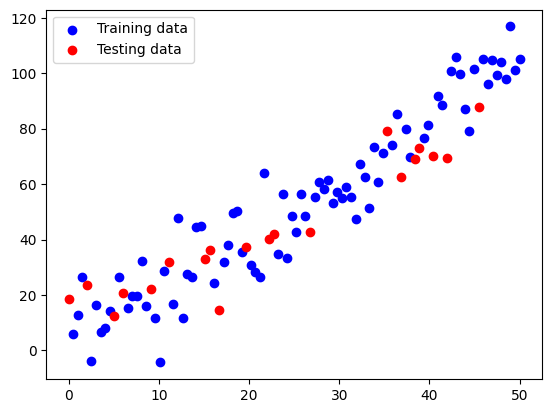

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# randomseed
np.random.seed(0)

# data : y = ax+b
a = 2
b = 1
noise_scale = 10

# data generation
x = np.linspace(0, 50, 100)
q = np.random.normal(0, noise_scale, x.shape)
y = a * x + b + q

# # data : y = a*exp(bx)
# a = 2
# b = 1
# c= 50
# noise_scale = 20

# # data generation
# x = np.linspace(0, 5, 100)
# y = a * np.exp(b * x) + q + c

# splitting dataset to training set and testing set 
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

#  data visualization
plt.scatter(x_train, y_train, color='blue', label='Training data')
plt.scatter(x_test, y_test, color='red', label='Testing data')
plt.legend()
plt.show()


## Build ANN model

In [43]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

# model = Sequential([
#     Dense(1, input_shape=(1,), activation='linear')
# ])

model = Sequential([
    Dense(5, input_shape=(1,), activation='relu'),
    Dense(3, activation='relu'),
    Dense(1, activation='linear')
])

# Sequential.help
# 编译模型
model.compile(optimizer=Adam(learning_rate=0.001), loss='mse')


## Training ANN model

In [46]:
history = model.fit(x_train, y_train, validation_split=0.2, epochs=200, batch_size=1)

Epoch 1/200
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 108.4183 - val_loss: 79.8108
Epoch 2/200
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 90.2396 - val_loss: 80.5394
Epoch 3/200
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 132.6864 - val_loss: 79.9037
Epoch 4/200
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 95.0215 - val_loss: 80.6301
Epoch 5/200
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 133.4924 - val_loss: 79.6673
Epoch 6/200
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 89.0953 - val_loss: 79.8312
Epoch 7/200
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 115.6793 - val_loss: 79.9209
Epoch 8/200
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 105.2899 - val_loss: 79.4081
Epoch 9/200
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 111.0665 - val_loss: 79.9279
Epoch 10/200
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 73.4605 - val_loss: 80.7597
Epoch 11/200
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 97.0659 - val_loss: 80.2416
Epoch 12/200
64/64 ━━━━━━━━━━━━━━━━

## Model evaluation

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 116.7710


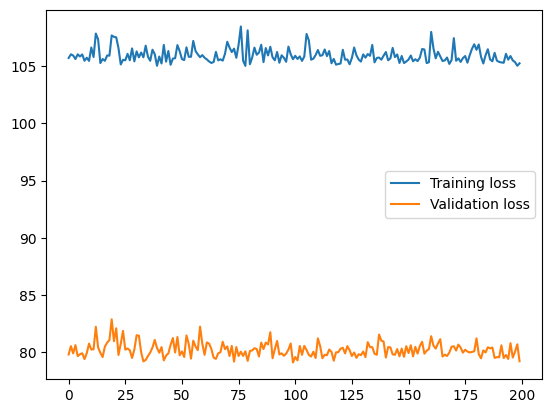

In [47]:
# 评估模型
model.evaluate(x_test, y_test)

# 绘制训练历史
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.legend()
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


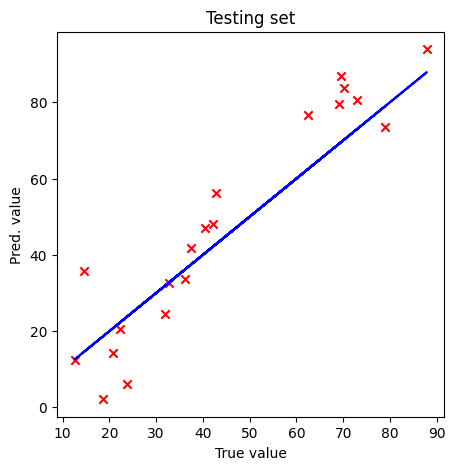

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


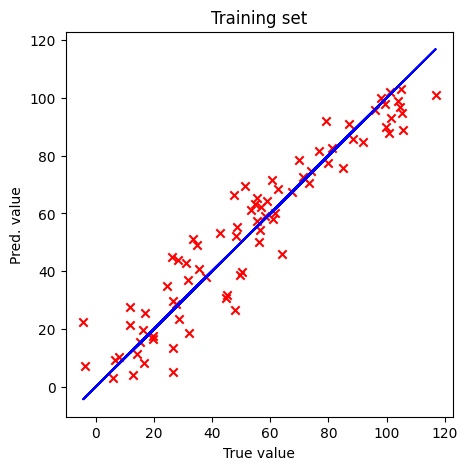

In [49]:
def plot_scatter (x, y, title, x_label, y_label,n):
    # plt.subplot(2, 2, n);
    plt.figure(figsize=(5, 5));
    plt.plot(x, x, color="blue", label="d")
    plt.scatter(x, y, marker="x", color="red")
    # plt.axis((0,210, 0,210))
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.show()

y_pred = model.predict(x_test)
plot_scatter(y_test, y_pred, "Testing set", "True value", "Pred. value",1)

y_pred = model.predict(x_train)
plot_scatter(y_train, y_pred, "Training set", "True value", "Pred. value",2)


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


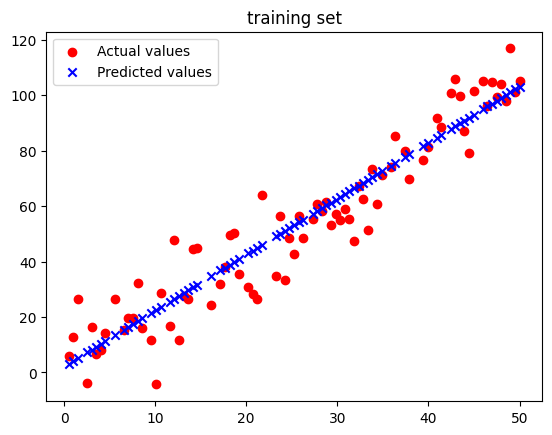

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


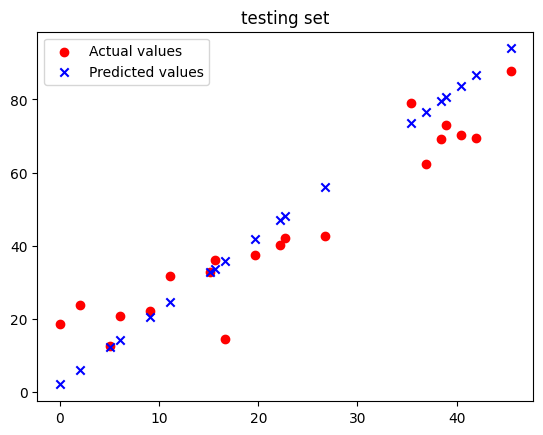

In [50]:
y_pred = model.predict(x_train)
plt.scatter(x_train, y_train, color='red', label='Actual values')
plt.scatter(x_train, y_pred, color='blue', marker='x', label='Predicted values')
plt.title('training set')
plt.legend()
plt.show()


# 使用模型进行预测
y_pred = model.predict(x_test)
# 可视化真实值与预测值
plt.scatter(x_test, y_test, color='red', label='Actual values')
plt.scatter(x_test, y_pred, color='blue', marker='x', label='Predicted values')
plt.title('testing set')
plt.legend()
plt.show()

### Exercise : Please try to write R2 and Pearson correlation function for evaluating the training model

## coefficient of determination, denoted R2
https://en.wikipedia.org/wiki/Coefficient_of_determination

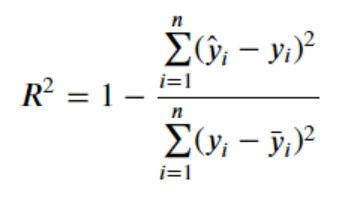


## Pearson correlation function
#### The Pearson correlation measures the strength of the linear relationship between two variables. It has a value between -1 to 1, with a value of -1 meaning a total negative linear correlation, 0 being no correlation, and + 1 meaning a total positive correlation.

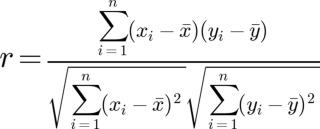

餘弦相似度的定義是兩個向量的點積除以這兩個向量模的乘積：

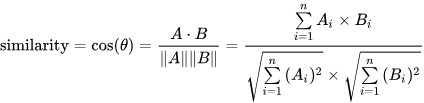
​